In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math
from data_processing import DataProcessing

In [23]:
def compute_cost(x, y, w, b):
    y_hat = np.dot(x, w)
    y_hat = y_hat + b
    diff = np.square(y_hat - y)
    cost = np.mean(diff)
    cost = cost / 2
    return cost

In [24]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    y_hat = np.dot(x, w)
    y_hat = y_hat + b
    diff = y_hat - y
    dj_db = np.mean(diff)
    dj_dw = np.dot(x.T, diff)
    dj_dw = (1 / m) * dj_dw
    return dj_dw, dj_db

In [25]:
dp = DataProcessing()
xi, yi = dp.get_training_data("ML_HP_MF")
(m, n) = xi.shape
alpha = 0.0001
epoch = 10000
w = np.random.randn(n)
b = np.random.randn()
print(f"m = {m}")
print(f"n = {n}")
print(f"alpha = {alpha}")
print(f"Number of iterations = {epoch}")
print(f"w = {w}")
print(f"b = {b}")

m = 436
n = 4
alpha = 0.0001
Number of iterations = 10000
w = [-1.47237306  1.33302405  1.09887582  0.81735744]
b = -1.671211743448315


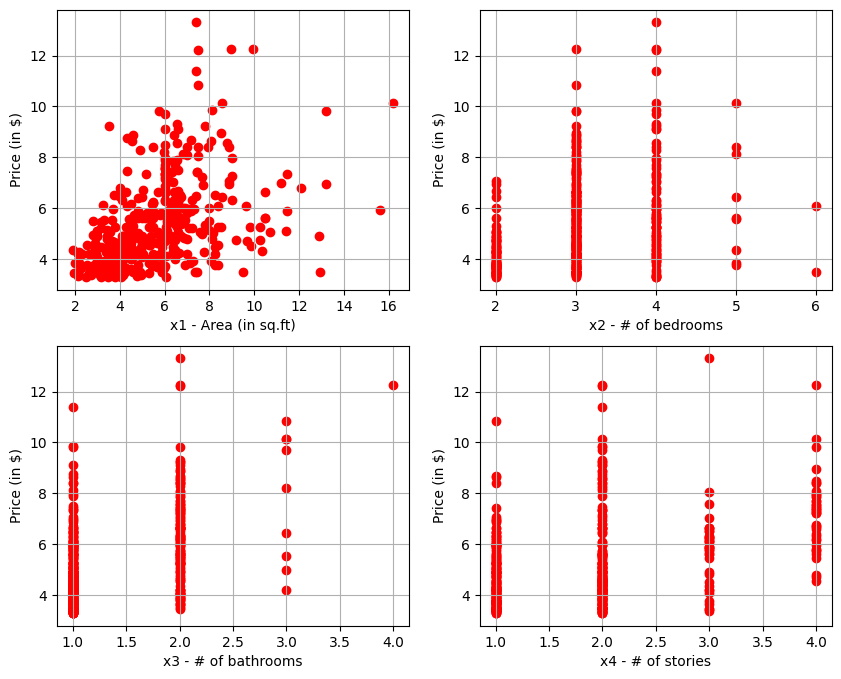

In [26]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axs[0, 0].scatter(xi[:,0], yi, c='r')
axs[0, 0].set_xlabel("x1 - Area (in sq.ft)")
axs[0, 0].set_ylabel("Price (in $)")
axs[0, 0].grid()

axs[0, 1].scatter(xi[:,1], yi, c='r')
axs[0, 1].set_xlabel("x2 - # of bedrooms")
axs[0, 1].set_ylabel("Price (in $)")
axs[0, 1].grid()

axs[1, 0].scatter(xi[:,2], yi, c='r')
axs[1, 0].set_xlabel("x3 - # of bathrooms")
axs[1, 0].set_ylabel("Price (in $)")
axs[1, 0].grid()

axs[1, 1].scatter(xi[:,3], yi, c='r')
axs[1, 1].set_xlabel("x4 - # of stories")
axs[1, 1].set_ylabel("Price (in $)")
axs[1, 1].grid()

In [27]:
epochs = np.empty(0, dtype='int')
costs = np.empty(0, dtype='float')
W_final = np.zeros(n, dtype='float')
b_final = float(0)
min_cost = float('inf')
for i in range(1, epoch + 1):
    dj_dw, dj_db = compute_gradient(xi, yi, w, b)
    w = w - (alpha * dj_dw)
    b = b - (alpha * dj_db)
    cost = compute_cost(xi, yi, w, b)
    epochs = np.append(epochs, i)
    costs = np.append(costs, cost)
    if i % (math.floor(epoch / 10)) == 0:
        print(f"Iteration {i} :: cost = {cost} :: w = {w} :: b = {b}")
    
    if cost < min_cost:
        min_cost = cost
        b_final = b
        W_final = np.copy(w)
print(f"Minimum cost = {min_cost} for w = {W_final} and b = {b_final}")

Iteration 1000 :: cost = 2.5571295668265654 :: w = [-0.31166879  1.67206604  1.26397651  1.00068547] :: b = -1.5349847088608837
Iteration 2000 :: cost = 2.0208699450565226 :: w = [-0.1782299   1.52922626  1.21378176  0.89031921] :: b = -1.5559811264462529
Iteration 3000 :: cost = 1.6611421768864674 :: w = [-0.07445981  1.40743246  1.17207422  0.79955754] :: b = -1.572702171698439
Iteration 4000 :: cost = 1.4187804374343003 :: w = [0.01060773 1.30582129 1.13858893 0.72657859] :: b = -1.58499564727649
Iteration 5000 :: cost = 1.2552479604342195 :: w = [0.08038411 1.22082859 1.1118396  0.66810699] :: b = -1.5936508522529458
Iteration 6000 :: cost = 1.1446748872968653 :: w = [0.137626   1.14951174 1.09059969 0.62145078] :: b = -1.599321248480691
Iteration 7000 :: cost = 1.0696935033932355 :: w = [0.18459193 1.08945711 1.07386412 0.584408  ] :: b = -1.6025427162279091
Iteration 8000 :: cost = 1.0186429566709656 :: w = [0.2231326  1.03868469 1.0608094  0.55517809] :: b = -1.603754738175176
I

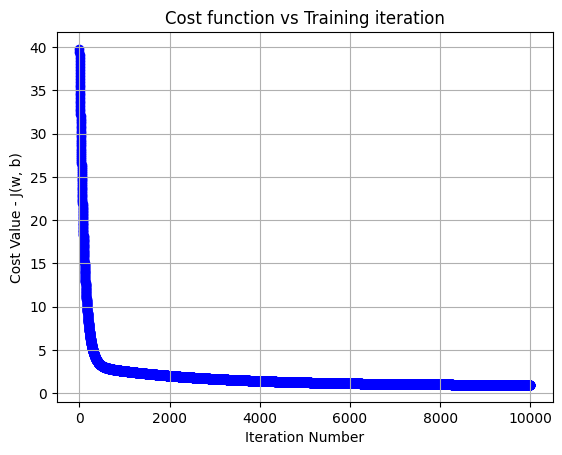

In [28]:
fig, ax = plt.subplots()
ax.set_title("Cost function vs Training iteration")
ax.scatter(epochs, costs, c='b')
ax.set_ylabel("Cost Value - J(w, b)")
ax.set_xlabel("Iteration Number")
ax.grid()